In [324]:
#importing the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

In [325]:
#importing the targetted dataset and loading into a dataframe

record = pd.read_csv('Customer-Churn.csv')

In [326]:
#getting the number of columns and rows

record.shape

(7043, 21)

In [327]:
#getting the list of attributes columns

record.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [328]:
#calling to view the first 5 rows of the dataset

record.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [329]:
#checking for missing values in the dataset

record.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [330]:
#calling to view the statistical summary of the dataset

record.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [331]:
#checking for number of unique values of each of the attribute

record.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [332]:
#prints out beach list of unique values for every of the attribute in the dataset

print("Internet Service List: ",record['InternetService'].unique())
print("Gender List : ",record['gender'].unique())
print("Senior Citizen List :" , record['SeniorCitizen'].unique())
print("Partner List :",record['Partner'].unique())
print("Dependents List :",record['Dependents'].unique())
print("Phone Service List : ", record['PhoneService'].unique())
print("Multiple Lines List: ",record['MultipleLines'].unique())
print("Internet Service List :",record['InternetService'].unique())
print("Online Security List : ", record['OnlineSecurity'].unique())
print("Online Backup List: ",record['OnlineBackup'].unique())
print("Device Protection List :",record['DeviceProtection'].unique())
print("Tech Support List : ", record['TechSupport'].unique())
print("Streaming TV List: ",record['StreamingTV'].unique())
print("Streaming Movies List :",record['StreamingMovies'].unique())
print("Contract List : ", record['Contract'].unique())
print("Paperless Billing List: ",record['PaperlessBilling'].unique())
print("Payment Method List :",record['PaymentMethod'].unique())
print("Churn List :",record['Churn'].unique())

Internet Service List:  ['DSL' 'Fiber optic' 'No']
Gender List :  ['Female' 'Male']
Senior Citizen List : [0 1]
Partner List : ['Yes' 'No']
Dependents List : ['No' 'Yes']
Phone Service List :  ['No' 'Yes']
Multiple Lines List:  ['No phone service' 'No' 'Yes']
Internet Service List : ['DSL' 'Fiber optic' 'No']
Online Security List :  ['No' 'Yes' 'No internet service']
Online Backup List:  ['Yes' 'No' 'No internet service']
Device Protection List : ['No' 'Yes' 'No internet service']
Tech Support List :  ['No' 'Yes' 'No internet service']
Streaming TV List:  ['No' 'Yes' 'No internet service']
Streaming Movies List : ['No' 'Yes' 'No internet service']
Contract List :  ['Month-to-month' 'One year' 'Two year']
Paperless Billing List:  ['Yes' 'No']
Payment Method List : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn List : ['No' 'Yes']


In [333]:
#the datatypes of all attributes in the dataset

record.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [334]:
#here, we are trying to clean up the dataset
#TotalCharges is written in numeric form but the data type is stating it to be an object
#cleaning the dataset-we convert the datatype to float so as to be able to do analysis

record.replace(' ', np.nan, inplace=True)
record.dropna(inplace=True)
record['TotalCharges'] = record['TotalCharges'].astype('float')

In [335]:
#confirming data type change

record['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [336]:
#here, we are trying to clean up the dataset
#replacing the eror result "no internet service" with "No"

record = record.replace({'No internet service' : 'No',
                        'No phone service' : 'No'})

record['SeniorCitizen'] = record['SeniorCitizen'].replace({ 0 : 'No',
                                                            1 : 'Yes'})

In [337]:
#confirming that the attribute values have been replaced

print("Multiple Lines List: ",record['MultipleLines'].unique())

print("Online Security List : ", record['OnlineSecurity'].unique())
print("Online Backup List: ",record['OnlineBackup'].unique())
print("Device Protection List :",record['DeviceProtection'].unique())
print("Tech Support List : ", record['TechSupport'].unique())
print("Streaming TV List: ",record['StreamingTV'].unique())
print("Streaming Movies List :",record['StreamingMovies'].unique())

print("Senior Citizen List :" , record['SeniorCitizen'].unique())

Multiple Lines List:  ['No' 'Yes']
Online Security List :  ['No' 'Yes']
Online Backup List:  ['Yes' 'No']
Device Protection List : ['No' 'Yes']
Tech Support List :  ['No' 'Yes']
Streaming TV List:  ['No' 'Yes']
Streaming Movies List : ['No' 'Yes']
Senior Citizen List : ['No' 'Yes']


In [338]:
#Finding out the percentage of customers that have churn

total_not_churn = record[record.Churn=='No'].shape[0]
total_churn = record[record.Churn=='Yes'].shape[0]

churn_record = total_not_churn + total_churn

In [339]:
print((total_not_churn/churn_record) * 100,'% of customers still patronizes the company.')

print((total_churn/churn_record) * 100,'% of customers has stopped patronizing the company.')

73.42150170648463 % of customers still patronizes the company.
26.578498293515356 % of customers has stopped patronizing the company.


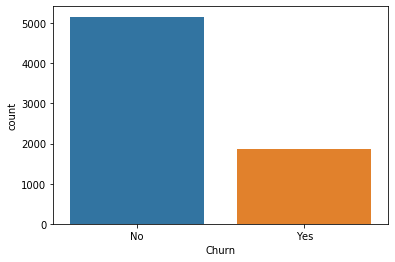

In [340]:
#visualization of the count of customer churn

sns.countplot(record['Churn'])

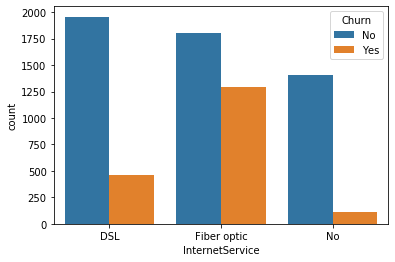

In [341]:
#Visualizing the churn count in respect to the interner service

sns.countplot(x = 'InternetService', hue= 'Churn', data = record)

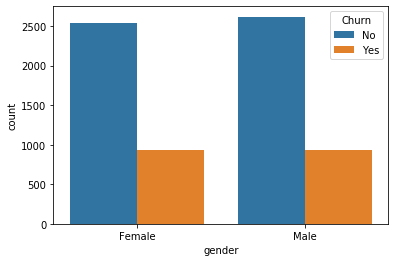

In [342]:
#Visualizing the churn count in respect to gender

sns.countplot(x = 'gender', hue= 'Churn', data = record)

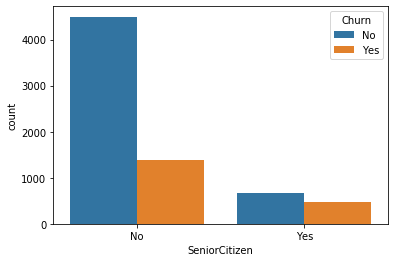

In [343]:
##Visualizing the churn count in respect to senior citizen 

sns.countplot(x = 'SeniorCitizen', hue= 'Churn', data = record)

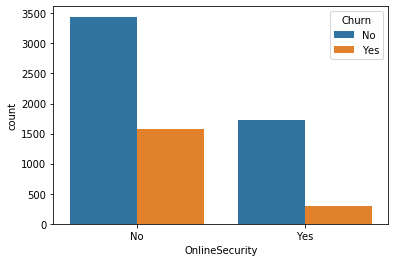

In [344]:
#Visualizing the churn count in respect to online security

sns.countplot(x = 'OnlineSecurity', hue= 'Churn', data = record)

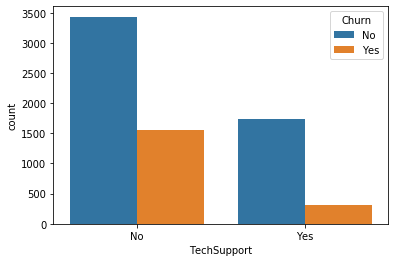

In [345]:
#Visualizing the churn count in respect to Technical support

sns.countplot(x = 'TechSupport', hue= 'Churn', data = record)

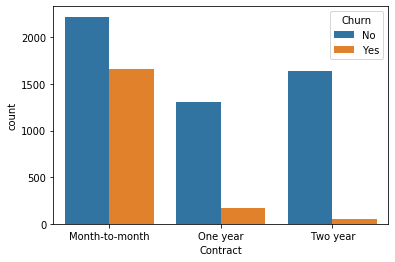

In [346]:
#Visualizing the churn count in respect to the Contract

sns.countplot(x = 'Contract', hue= 'Churn', data = record)

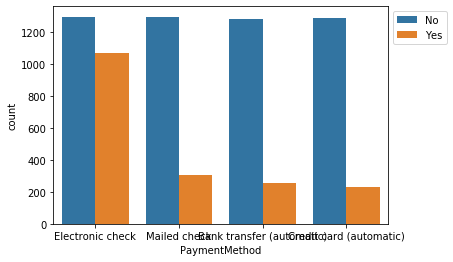

In [347]:
#Visualizing the churn count in respect to the payment method

sns.countplot(x = 'PaymentMethod', hue= 'Churn', data = record)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0E7C1F50>,
      dtype=object)

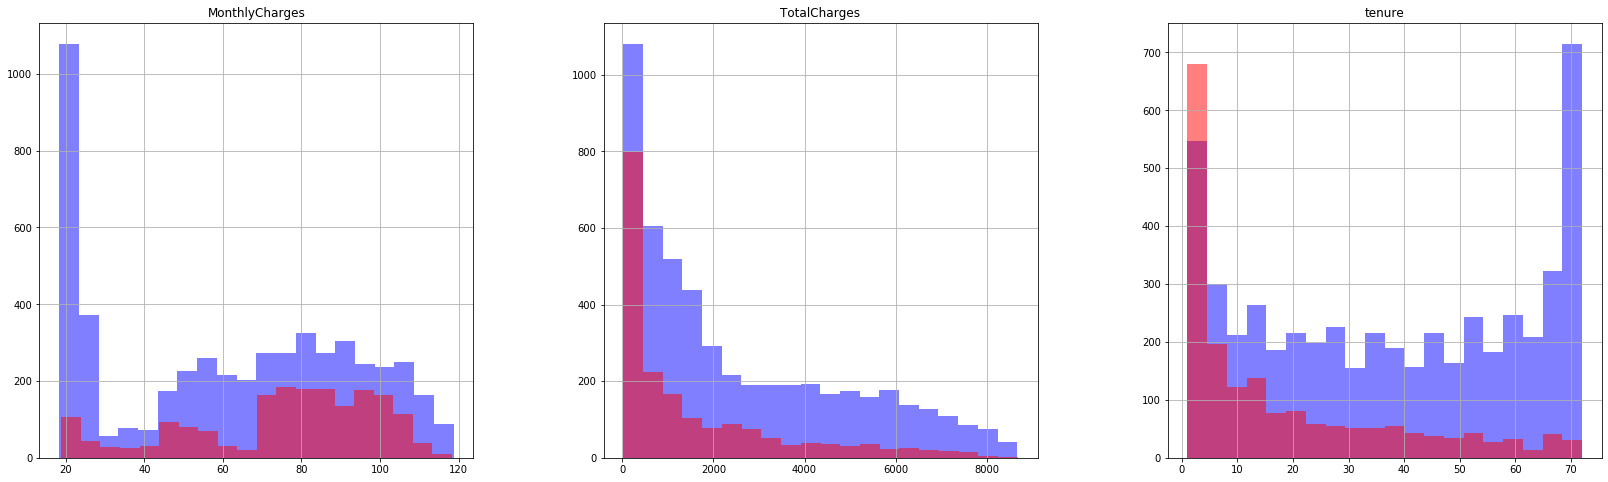

In [348]:
#Visualizing the churn count in respect to the 'tenure', 'MonthlyCharges' and'TotalCharges'

duration_attribute = ['tenure', 'MonthlyCharges','TotalCharges']
fig, duration = plt.subplots(1,3, figsize = (28,8))
record[record.Churn == 'No'][duration_attribute].hist(bins=20, color = 'blue', alpha = 0.5, ax=duration)
record[record.Churn == 'Yes'][duration_attribute].hist(bins=20, color = 'red', alpha = 0.5, ax=duration)

In [ ]:
#********************ANALYSIS REPORT **************************
#********************ANALYSIS REPORT **************************
#********************ANALYSIS REPORT **************************

#  >>>> To reduduce customer churn, the company might want to stop providing the fibre optics internet service as it is observed that most customers that churn are subscribed to the fibre optics service
#  >>>> It is observed that most have the customers that are staying pay low monthly charge. thus, the company will be advised to reduce their monthly charges
#  >>>> In respect to tenure, it is observed that the longer a customer patronizes the company, the more their probability of leaving.Thus, encourage the customers to enrol on a yearly contract and not monthly contract
#  >>>> Customers with online security tend to keep patronizing the company. Thus the ncompany will have to consider providing this online security service to their customers at almost no cost/ at no cost. this is to gain customer trust


In [349]:
#converting all numerical columns to numerical data types

for column in record.columns:
    if record[column].dtype == np.number:
        continue
    record[column] = LabelEncoder().fit_transform(record[column])

In [350]:
record.dtypes

customerID            int32
gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [351]:
record.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,33,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,44,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [352]:
record.drop('customerID', axis=1, inplace=True)

In [353]:
record.corr(method='pearson')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.011346,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.490912,0.469042,0.040033
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,0.011346,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,-0.313708,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307


In [354]:
x = record.drop('Churn', axis = 1)

In [355]:
y = record['Churn']

In [356]:
x = StandardScaler().fit_transform(x)

In [357]:
x.shape

(7032, 19)

In [358]:
y.shape

(7032,)

In [373]:
#converting the x variable to numpy

#x = x.to_numpy()

In [360]:
#converting the y variable to numpy

#y = y.to_numpy()

In [361]:
#creating the model

reg = LogisticRegression()

In [362]:
#splitting the dataset into 2 for training and for testing purpose

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)

In [363]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 19)
(1407, 19)
(5625,)
(1407,)


In [364]:
#train the model

reg.fit(x_train,y_train)

C:\Users\mujidat\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [365]:
print(reg.intercept_)

[-1.70742716]


In [366]:
print(reg.coef_)

[[-9.02447460e-03  9.50912761e-02 -2.68369255e-04 -5.82772233e-02
  -1.37230409e+00 -3.87300225e-01  5.33012535e-02 -2.35982547e-03
  -2.31078179e-01 -1.44338062e-01 -1.00118262e-01 -2.38864473e-01
  -2.72954892e-02 -9.67097811e-03 -6.00946332e-01  1.67300409e-01
   3.72661682e-02  1.00120020e+00  5.78600352e-01]]


In [367]:
#create the prediction on the test data

y_predict = reg.predict(x_test)

In [368]:
#print the prediction

print(y_predict)

[0 1 0 ... 0 0 0]


In [369]:
#checking precision for model


print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.53      0.57       366

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [370]:
reg.score(x_train,y_train)

0.8069333333333333

In [374]:
#********************MODEL REPORT **************************
#********************MODEL REPORT **************************
#********************MODEL REPORT **************************

#  >>>> The recall of the model is 89% which means the model correctly identifies 89% of the customers that were retained and missed 11%
#  >>>> The precision of the model is 85% and the f1 score is 88%
#  >>>> The model has an accuracy of 80% which is better than  the 73.42% guessing of customer with "No churn"